In [1]:
from pepnets.PeptideNetwork import PeptideNetwork
import random
import pandas as pd
import numpy as np


random.seed(42)
np.random.seed(42)

sus_scrofa = pd.read_csv("../data/sus_scrofa.gz", sep="\t")
sus_scrofa["Entry Name"] = sus_scrofa["Entry Name"].apply(lambda x: x.split("_")[0])
datamatrix = pd.read_csv("../data/data.csv")
datamatrix = datamatrix[datamatrix["Protein"] == "APOA1"]
pnet = PeptideNetwork(
    datamatrix=datamatrix,
    protein_database=sus_scrofa,
)

Reading peptides...


In [2]:
pnet.create_network(distance_cutoff=4)

{'APOA1': <networkx.classes.graph.Graph at 0x105d590d0>}

In [3]:
pnet.get_clusters(resolution=0.8)

['APOA1_0', 'APOA1_1', 'APOA1_2', 'APOA1_3', 'APOA1_4', 'APOA1_5', 'APOA1_6', 'APOA1_7', 'APOA1_8', 'APOA1_9', 'APOA1_10', 'APOA1_11', 'APOA1_12', 'APOA1_13', 'APOA1_14', 'APOA1_15', 'APOA1_16', 'APOA1_17', 'APOA1_18', 'APOA1_19', 'APOA1_20', 'APOA1_21']

<Figure size 640x480 with 0 Axes>

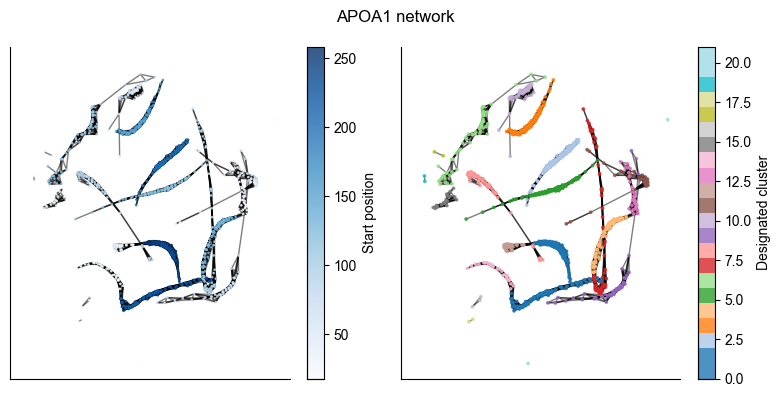

In [4]:
pnet.plot_protein("APOA1", save_str="../plots/APOA1.png")

In [5]:
pnet.clusters

['APOA1_0', 'APOA1_1', 'APOA1_2', 'APOA1_3', 'APOA1_4', 'APOA1_5', 'APOA1_6', 'APOA1_7', 'APOA1_8', 'APOA1_9', 'APOA1_10', 'APOA1_11', 'APOA1_12', 'APOA1_13', 'APOA1_14', 'APOA1_15', 'APOA1_16', 'APOA1_17', 'APOA1_18', 'APOA1_19', 'APOA1_20', 'APOA1_21']

In [6]:
from pepnets.FeatureMatrix import FeatureMatrix

fm = FeatureMatrix(datamatrix, pnet.clusters)

Dropped:  0


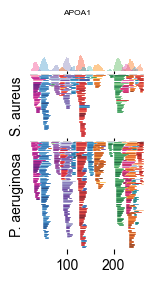

In [9]:
from pepnets.PeptiGrams import PeptiGram

design = pd.read_csv("../data/design.csv")
peptigram = PeptiGram(fm.datamatrix, design)
peptigram.plot_peptigram(
    "APOA1", groups=["S. aureus", "P. aeruginosa"], days=["Day 1"], size_factor=0.3,
    save_str="../plots/APOA1_pg.png"
)
